In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import os
from IPython.display import display
import networkx as nx
df = pd.read_csv('./data/20221007_20231006_all.csv')
df

,title,time,link,text,gzh,city_name,city_shortname,province,date
0,"【齐参与】全民国家安全教育日专项答题""",2023/04/12 18:40,http://mp.weixin.qq.com/s?__biz=MzAwOTc3NjUzMg...,今日试题1、根据我国宪法规定，台湾是中华人民共和国的神圣领土的一部分。完成统一祖国的大业是包...,濮阳发布,濮阳市,濮阳,河南,2023-04-12 18:40:00
1,"濮阳6家企业向省第二届职业技能大赛赞助15万元""",2023/04/12 18:40,http://mp.weixin.qq.com/s?__biz=MzAwOTc3NjUzMg...,4月10日，河南省第二届职业技能大赛赞助合作意向洽谈会在市技师学院召开。我市6家企业分别与省...,濮阳发布,濮阳市,濮阳,河南,2023-04-12 18:40:00
2,"H5丨濮阳市市民文明手册""",2023/04/14 19:00,http://mp.weixin.qq.com/s?__biz=MzAwOTc3NjUzMg...,H5丨濮阳市市民文明手册识别下方二维码查看👇来源：濮阳市精神文明建设指导委员会办公室编辑：刘...,濮阳发布,濮阳市,濮阳,河南,2023-04-14 19:00:00
3,"提升集约绿色发展水平！《关于实施濮阳市开发区标准体系及基准值（试行）的通知》出台""",2023/04/16 18:55,http://mp.weixin.qq.com/s?__biz=MzAwOTc3NjUzMg...,近日，市政府办公室印发《关于实施濮阳市开发区标准体系及基准值（试行）的通知》（以下简称《标准...,濮阳发布,濮阳市,濮阳,河南,2023-04-16 18:55:00
4,"100亿元补贴来了！惠及濮阳这些人！""",2023/04/18 18:45,http://mp.weixin.qq.com/s?__biz=MzAwOTc3NjUzMg...,据财政部网站4月17日消息中央财政日前下达资金100亿元向实际种粮农民发放一次性补贴统筹支持...,濮阳发布,濮阳市,濮阳,河南,2023-04-18 18:45:00
...,...,...,...,...,...,...,...,...,...
692854,进入各类公共场所，如何做好防疫措施？,2022/10/21 18:10,http://mp.weixin.qq.com/s?__biz=MzA5NzMyODU0Mw...,防疫行动 从点滴做起人们日常生活难免要进入各类公共场所，在疫情反复的今天，仍要做好各类防疫措...,梧州发布,梧州市,梧州,广西,2022-10-21 18:10:00
692855,被告知为密接后，该怎么做？,2022/10/20 18:33,http://mp.weixin.qq.com/s?__biz=MzA5NzMyODU0Mw...,每天按时上下班回到家却接到了疫情流调电话，瞬间就有点小紧张一旦碰到这种情况接下来该怎么办？如...,梧州发布,梧州市,梧州,广西,2022-10-20 18:33:00
692856,市十五届人民政府召开第23次常务会议，审议有关文件并部署落实措施,2022/10/19 23:36,http://mp.weixin.qq.com/s?__biz=MzA5NzMyODU0Mw...,10月19日，市长钟畅姿主持召开市十五届人民政府第23次常务会议，传达学习国家、自治区有关文...,梧州发布,梧州市,梧州,广西,2022-10-19 23:36:00
692857,多措并举激发科技创新多元化发展丨李彬费志荣来梧开展调研并督导有关工作,2022/10/19 18:50,http://mp.weixin.qq.com/s?__biz=MzA5NzMyODU0Mw...,10月17日、18日，自治区政协副主席李彬、费志荣率调研组、督导组来梧围绕“提高全社会研发经...,梧州发布,梧州市,梧州,广西,2022-10-19 18:50:00


## The ratio that contains "release account"

In [2]:
num = 0
arr = []
for i in list(set(df['gzh'])):
    if '发布' not in i:
        arr.append(i)
        num += 1
print('没有包含发布的公众号个数: ', num)
print('包含发布的比率：', 340-num, (340-num)/340 * 100)
print(arr)

没有包含发布的公众号个数:  70
包含发布的比率： 270 79.41176470588235
['丽江市人民政府门户网站', '吐鲁番政府网', '大凉山', '广西贺州政府网', '湘西政务', '香港政府新聞網', '博州政府网', '绥化政务', '大庆政务', '四川雅安', '千姿百色', '遇见北海', '定西市人民政府', '海北政务', '迪庆藏族自治州人民政府网', '网信山南', '今日台湾', '文明阿坝', '古城喀什', '南充播报', '我的张家界', '阜新政务', '甘南藏族自治州人民政府', '黔东南州人民政府网', '锡林郭勒盟政务门户网', '宝鸡市', '六盘水市人民政府网', '中国葫芦岛', '河池市人民政府办公室', '孝感宣传', '阿勒泰市人民政府', '黔南州人民政府网', '中国三沙', '文明榆林', '和田政务在线', '贵港宣传', '大兴安岭政务', '辽阳政务', '怀化新闻网', '宁德政务', '黄南宣传', '抚顺政务', '美丽巴中', '克州政府网', '本溪日报融媒体', '鸡西政务', '儋州市人民政府', '南平政务服务', '伊犁政府网', '乌海政府信息网', '日喀则新闻中心', '昌吉政务', '海东市政府网', '佳木斯政务', '铜仁市人民政府网', '西藏阿里地区行政公署', '临沧市人民政府', '阿克苏政府网', '中国漳州', '巴音郭楞零距离', '广元政务', '果洛政务', '乌鲁木齐政府网', '克拉玛依政府网', '塔城市政府网', '最内江', '福州新闻', '黑河政务', '昭通市人民政府', '辽源政务']


## Statistical article number distribution

In [3]:
articles_tj = []
for i in list(set(df['city_name'])):
    articles_tj.append([i, len(df[df.city_name==i])])
articles_tj

[['深圳市', 3953],
 ['怒江傈僳族自治州', 1289],
 ['东莞市', 1267],
 ['玉溪市', 4351],
 ['长治市', 48],
 ['鞍山市', 4663],
 ['迪庆藏族自治州', 925],
 ['武汉市', 3157],
 ['玉树藏族自治州', 1380],
 ['克拉玛依市', 16],
 ['宜昌市', 2477],
 ['三明市', 3032],
 ['鹰潭市', 1845],
 ['鹤岗市', 972],
 ['威海市', 1035],
 ['萍乡市', 1726],
 ['鹤壁市', 379],
 ['芜湖市', 2855],
 ['淄博市', 1643],
 ['海东市', 146],
 ['南宁市', 2437],
 ['赤峰市', 263],
 ['荆州市', 2953],
 ['宁德市', 1760],
 ['台湾省', 1380],
 ['淮北市', 2080],
 ['平顶山市', 3253],
 ['阳江市', 1884],
 ['池州市', 1835],
 ['大庆市', 799],
 ['镇江市', 1602],
 ['北京市', 2953],
 ['邢台市', 331],
 ['黔南布依族苗族自治州', 1781],
 ['南平市', 128],
 ['无锡市', 3253],
 ['保定市', 2210],
 ['淮安市', 3043],
 ['凉山彝族自治州', 893],
 ['赣州市', 2290],
 ['广州市', 1144],
 ['贺州市', 668],
 ['济宁市', 870],
 ['和田地区', 743],
 ['贵港市', 1621],
 ['南阳市', 2393],
 ['西安市', 3570],
 ['衡阳市', 504],
 ['咸阳市', 2296],
 ['绥化市', 699],
 ['随州市', 847],
 ['达州市', 2758],
 ['吕梁市', 1377],
 ['黄冈市', 317],
 ['台州市', 2978],
 ['安阳市', 309],
 ['甘南藏族自治州', 805],
 ['湘西土家族苗族自治州', 691],
 ['咸宁市', 2292],
 ['辽源市', 140],
 ['百色市', 1314],
 ['梧州市', 

In [4]:
df_articles_tj = pd.DataFrame(articles_tj, columns=['name', 'count'])
df_articles_tj = df_articles_tj.sort_values(by='count', ascending=False).reset_index(drop=True)
df_articles_tj[0:20]

,name,count
0,哈尔滨市,7096
1,齐齐哈尔市,6150
2,双鸭山市,5950
3,上海市,5604
4,红河哈尼族彝族自治州,5537
5,西双版纳傣族自治州,5383
6,巴中市,5309
7,重庆市,5058
8,汕头市,4986
9,长春市,4968


/Users/wanglihua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


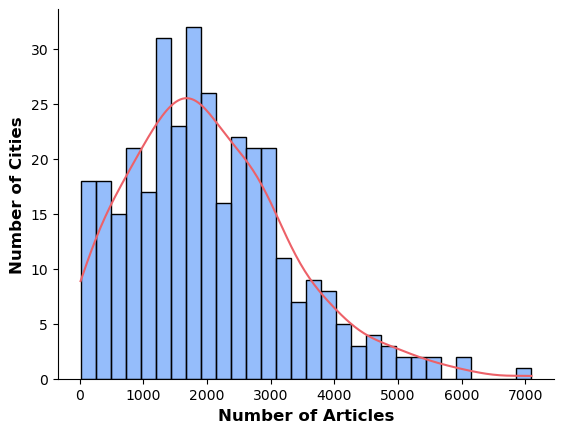

In [5]:
COLOR  = '#2C7DF9' # '#ED6168'
# sns.set_style("whitegrid")
LINE_COLOR = '#ED6168'

ax1 = sns.histplot(df_articles_tj, x='count', color=COLOR, bins=30, legend=False, kde=True)
ax1.set_xlabel('Number of Articles', fontdict={'weight': 600, 'size':12})
ax1.set_ylabel('Number of Cities', fontdict={'weight': 600, 'size':12})
ax1.lines[0].set_color(LINE_COLOR)
sns.despine( right=True, top=True)
ax1.figure.savefig('./data/result/figs/articles_tj.pdf', dpi=600, bbox_inches = 'tight')

In [6]:
len(set([i.split(' ')[0] for i in df[df.city_name=='安庆市']['date']]))

352

## Statistical article: Days distribution

In [7]:
# 发布的天数
city_days = []
for i in list(set(df['city_name'])):
    n = len(set([i.split(' ')[0] for i in df[df.city_name==i]['date']]))
    city_days.append([i, n])
city_days

[['深圳市', 365],
 ['怒江傈僳族自治州', 284],
 ['东莞市', 364],
 ['玉溪市', 361],
 ['长治市', 38],
 ['鞍山市', 365],
 ['迪庆藏族自治州', 202],
 ['武汉市', 365],
 ['玉树藏族自治州', 354],
 ['克拉玛依市', 8],
 ['宜昌市', 365],
 ['三明市', 365],
 ['鹰潭市', 365],
 ['鹤岗市', 252],
 ['威海市', 362],
 ['萍乡市', 365],
 ['鹤壁市', 164],
 ['芜湖市', 365],
 ['淄博市', 354],
 ['海东市', 52],
 ['南宁市', 365],
 ['赤峰市', 104],
 ['荆州市', 365],
 ['宁德市', 274],
 ['台湾省', 260],
 ['淮北市', 364],
 ['平顶山市', 360],
 ['阳江市', 365],
 ['池州市', 365],
 ['大庆市', 299],
 ['镇江市', 320],
 ['北京市', 365],
 ['邢台市', 49],
 ['黔南布依族苗族自治州', 361],
 ['南平市', 36],
 ['无锡市', 365],
 ['保定市', 313],
 ['淮安市', 365],
 ['凉山彝族自治州', 228],
 ['赣州市', 365],
 ['广州市', 363],
 ['贺州市', 252],
 ['济宁市', 360],
 ['和田地区', 190],
 ['贵港市', 365],
 ['南阳市', 291],
 ['西安市', 365],
 ['衡阳市', 193],
 ['咸阳市', 365],
 ['绥化市', 278],
 ['随州市', 276],
 ['达州市', 365],
 ['吕梁市', 260],
 ['黄冈市', 242],
 ['台州市', 365],
 ['安阳市', 184],
 ['甘南藏族自治州', 348],
 ['湘西土家族苗族自治州', 206],
 ['咸宁市', 365],
 ['辽源市', 57],
 ['百色市', 349],
 ['梧州市', 364],
 ['抚顺市', 204],
 ['十堰市', 355],
 ['菏泽市',

In [8]:
df_city_days = pd.DataFrame(city_days, columns=['name', 'count'])
df_city_days = df_city_days.sort_values(by='count',  ascending=False).reset_index(drop=True)
df_city_days

,name,count
0,深圳市,365
1,金华市,365
2,营口市,365
3,遵义市,365
4,河源市,365
...,...,...
335,南平市,36
336,海南藏族自治州,32
337,新乡市,28
338,黔西南布依族苗族自治州,12


In [9]:
df_city_days[df_city_days['count']>=365]

,name,count
0,深圳市,365
1,金华市,365
2,营口市,365
3,遵义市,365
4,河源市,365
...,...,...
152,萍乡市,365
153,廊坊市,365
154,长沙市,365
155,南昌市,365


/Users/wanglihua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


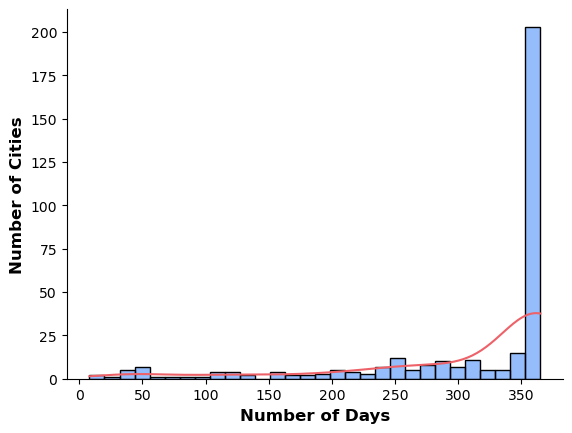

In [10]:
COLOR  = '#2C7DF9' # '#ED6168'
LINE_COLOR = '#ED6168'


ax2 = sns.histplot(df_city_days, x='count', color=COLOR, bins=30, legend=False, kde=True)
ax2.set_xlabel('Number of Days', fontdict={'weight': 600, 'size':12})
ax2.set_ylabel('Number of Cities', fontdict={'weight': 600, 'size':12})
ax2.lines[0].set_color(LINE_COLOR)
sns.despine(right=True, top=True)
ax2.figure.savefig('./data/result/figs/articles_days_dis.pdf', dpi=600, bbox_inches = 'tight')

In [11]:
len(df_city_days[df_city_days['count']<=100])

19

In [12]:
df_city_days[df_city_days['count']<=100]

,name,count
321,鄂尔多斯市,96
322,鄂州市,89
323,桂林市,73
324,辽源市,57
325,北海市,55
326,海东市,52
327,乌鲁木齐市,50
328,邢台市,49
329,丽江市,48
330,香港特别行政区,47
